# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

 -0.9356762498364929
5.077015403080616 -0.9342570441335367
5.081016203240648 -0.932822884356782
5.08501700340068 -0.9313737934619356
5.089017803560712 -0.929909794643698
5.093018603720744 -0.9284309113353916
5.097019403880776 -0.9269371672085852
5.101020204040808 -0.925428586172716
5.10502100420084 -0.9239051923747058
5.109021804360872 -0.9223670101985759
5.113022604520904 -0.9208140642650555
5.117023404680936 -0.9192463794311881
5.121024204840968 -0.9176639807899338
5.1250250050010004 -0.9160668936697676
5.1290258051610325 -0.9144551436342735
5.1330266053210645 -0.9128287564817361
5.1370274054810965 -0.9111877582447272
5.1410282056411285 -0.909532175189689
5.1450290058011605 -0.9078620338165139
5.1490298059611925 -0.9061773608581204
5.1530306061212245 -0.9044781832800249
5.157031406281257 -0.9027645282799105
5.161032206441289 -0.9010364232871914
5.165033006601321 -0.8992938959625734
5.169033806761353 -0.8975369741976124
5.173034606921385 -0.8957656861142665
5.177035407081417 -0.893980

10.046009201840368 -0.5820368004553567
10.0500100020004 -0.5852854340676006
10.054010802160432 -0.5885246993784448
10.058011602320464 -0.5917545445389757
10.062012402480496 -0.5949749178510627
10.066013202640528 -0.5981857677681849
10.07001400280056 -0.6013870428962566
10.074014802960592 -0.6045786919944497
10.078015603120624 -0.6077606639760141
10.082016403280656 -0.6109329079090955
10.086017203440688 -0.61409537301755
10.09001800360072 -0.6172480086817577
10.094018803760752 -0.6203907644394322
10.098019603920784 -0.623523589986429
10.102020404080816 -0.62664643517755
10.106021204240848 -0.6297592500273466
10.11002200440088 -0.6328619847109198
10.114022804560912 -0.6359545895647173
10.118023604720944 -0.6390370150873289
10.122024404880976 -0.6421092119402786
10.126025205041008 -0.6451711309488145
10.13002600520104 -0.6482227231026955
10.134026805361072 -0.6512639395569764
10.138027605521104 -0.6542947316327891
10.142028405681137 -0.6573150508181222
10.146029205841169 -0.66032484876859

15.023004600920183 0.6326410019357782
15.027005401080215 0.6295375465883216
15.031006201240247 0.6264240146233112
15.03500700140028 0.6233004558771245
15.039007801560311 0.6201669203466313
15.043008601720343 0.6170234581883942
15.047009401880375 0.6138701197178646
15.051010202040407 0.6107069554085782
15.05501100220044 0.6075340158913467
15.059011802360471 0.6043513519534476
15.063012602520503 0.6011590145378111
15.067013402680535 0.5979570547422046
15.071014202840567 0.5947455238184154
15.0750150030006 0.5915244731714296
15.079015803160631 0.5882939543586096
15.083016603320663 0.5850540190888691
15.087017403480695 0.5818047192218451
15.091018203640727 0.5785461067670676
15.09501900380076 0.5752782338831278
15.099019803960791 0.5720011528768428
15.103020604120823 0.5687149162024184
15.107021404280855 0.5654195764606094
15.111022204440888 0.5621151863978776
15.11502300460092 0.5588017989055482
15.119023804760952 0.5554794670189621
15.123024604920984 0.5521482439166282
15.127025405081016

0.8812165813314098
19.931986397279456 0.8831007529574059
19.935987197439488 0.8849707893366684
19.93998799759952 0.8868266605366835
19.943988797759552 0.8886683368516701
19.947989597919584 0.8904957888030566
19.951990398079616 0.8923089871399514
19.955991198239648 0.8941079028396118
19.95999199839968 0.8958925071079088
19.963992798559712 0.897662771379787
19.967993598719744 0.8994186673197229
19.971994398879776 0.9011601668221778
19.975995199039808 0.9028872420120478
19.97999599919984 0.9045998652451104
19.983996799359872 0.9062980091084663
19.987997599519904 0.9079816464209782
19.991998399679936 0.909650750233707
19.995999199839968 0.9113052938303416
20.0 0.9129452507276277


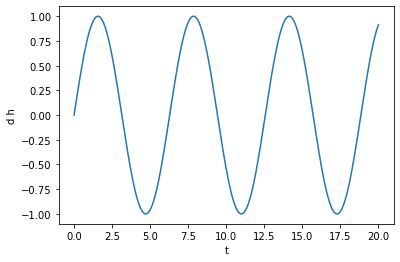

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

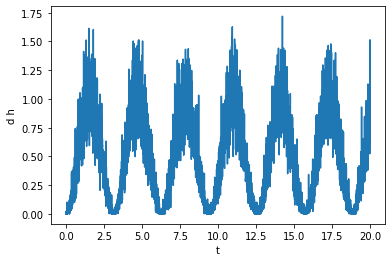

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

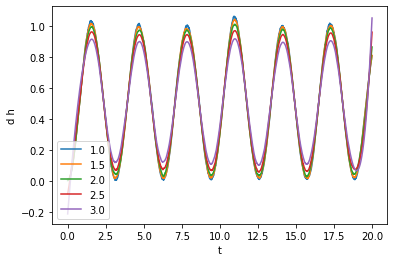

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

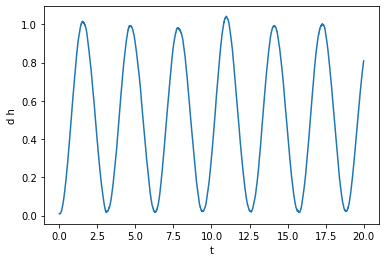

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1821


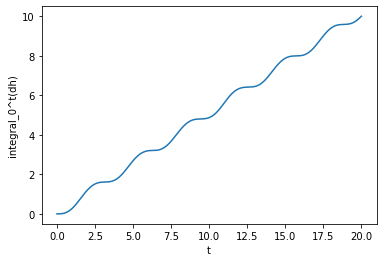

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

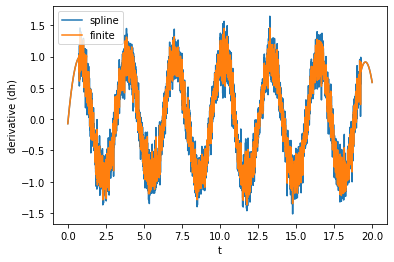

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

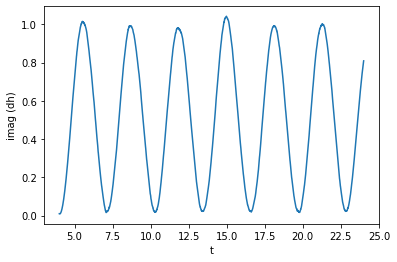

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

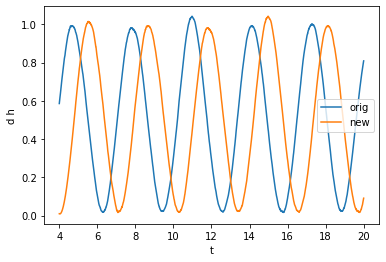

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

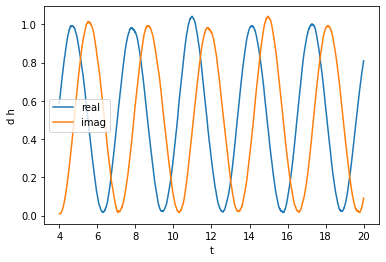

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

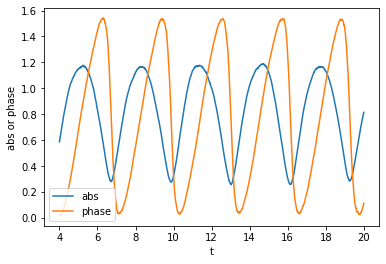

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

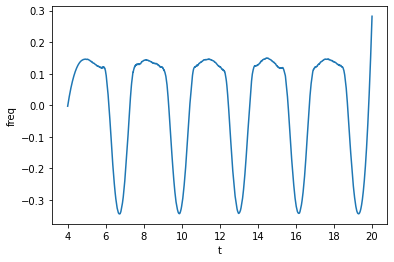

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

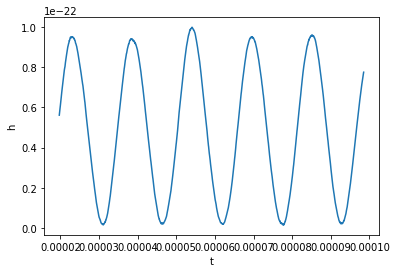

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

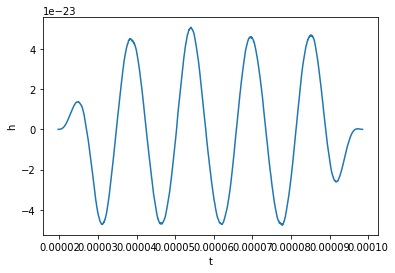

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

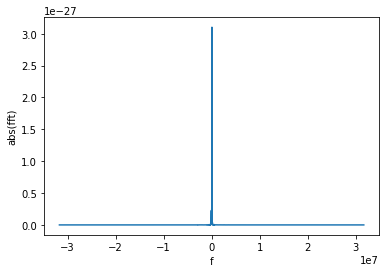

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

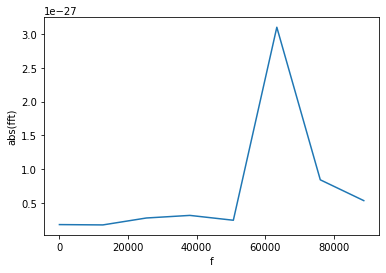

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64174.04


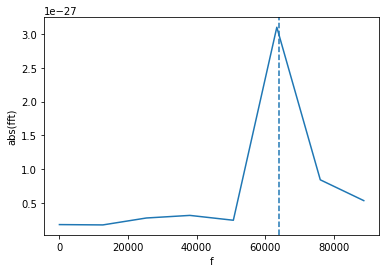

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.101e-27
Maximum with mask 8.417e-28
Length with mask 8
Length after having removed the masked points 7
